# ERA5 数据可视化

这个笔记本用于可视化 ERA5 气候数据文件。我们将使用 xarray 来读取 NetCDF 文件，并使用 matplotlib 进行可视化。

In [1]:
# 导入必要的库
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# 设置matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [5]:
# 获取所有ERA5数据文件
era5_files = sorted(glob.glob('era5_*.nc'))
print(f"找到 {len(era5_files)} 个ERA5数据文件:")

找到 24 个ERA5数据文件:


In [6]:
# 解压所有的 ERA5 文件
import zipfile
import shutil

def unzip_era5_file(zip_path):
    try:
        # 创建一个临时目录来解压文件
        temp_dir = os.path.join(os.path.dirname(zip_path), 'temp_extract')
        os.makedirs(temp_dir, exist_ok=True)

        print(f"\n处理文件: {os.path.basename(zip_path)}")

        # 解压文件
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # 获取压缩包中的文件列表
            file_list = zip_ref.namelist()
            print(f"压缩包中的文件: {file_list}")

            # 解压所有文件
            zip_ref.extractall(temp_dir)

            # 对于每个解压出来的 .nc 文件
            for file in file_list:
                if file.endswith('.nc'):
                    # 构建源文件和目标文件的路径
                    src_file = os.path.join(temp_dir, file)
                    dst_file = zip_path  # 使用原始zip文件的路径

                    # 移动文件，替换原始的zip文件
                    shutil.move(src_file, dst_file)
                    print(f"已解压并替换: {os.path.basename(dst_file)}")

        # 清理临时目录
        shutil.rmtree(temp_dir)
        return True

    except Exception as e:
        print(f"解压文件时出错: {str(e)}")
        return False

# 处理所有找到的文件
for file in era5_files:
    if file.endswith('.nc'):
        try:
            with open(file, 'rb') as f:
                header = f.read(4)
                # 检查是否为ZIP文件（文件魔数：504b0304）
                if header.hex() == '504b0304':
                    print(f"\n{file} 是ZIP文件，开始解压...")
                    unzip_era5_file(file)
                else:
                    print(f"\n{file} 不是ZIP文件，跳过...")
        except Exception as e:
            print(f"处理文件时出错: {str(e)}")


era5_202201.nc 不是ZIP文件，跳过...

era5_202202.nc 不是ZIP文件，跳过...

era5_202203.nc 不是ZIP文件，跳过...

era5_202204.nc 不是ZIP文件，跳过...

era5_202205.nc 不是ZIP文件，跳过...

era5_202206.nc 不是ZIP文件，跳过...

era5_202207.nc 不是ZIP文件，跳过...

era5_202208.nc 不是ZIP文件，跳过...

era5_202209.nc 不是ZIP文件，跳过...

era5_202210.nc 不是ZIP文件，跳过...

era5_202211.nc 不是ZIP文件，跳过...

era5_202212.nc 不是ZIP文件，跳过...

era5_202401.nc 是ZIP文件，开始解压...

处理文件: era5_202401.nc
解压文件时出错: File is not a zip file

era5_202402.nc 不是ZIP文件，跳过...

era5_202403.nc 不是ZIP文件，跳过...

era5_202404.nc 不是ZIP文件，跳过...

era5_202405.nc 不是ZIP文件，跳过...

era5_202406.nc 不是ZIP文件，跳过...

era5_202407.nc 是ZIP文件，开始解压...

处理文件: era5_202407.nc
压缩包中的文件: ['data_stream-oper_stepType-instant.nc', 'data_stream-wave_stepType-instant.nc']
已解压并替换: era5_202407.nc
已解压并替换: era5_202407.nc

era5_202408.nc 是ZIP文件，开始解压...

处理文件: era5_202408.nc
压缩包中的文件: ['data_stream-oper_stepType-instant.nc', 'data_stream-wave_stepType-instant.nc']
已解压并替换: era5_202408.nc
已解压并替换: era5_202408.nc

era5_202409.nc 是ZIP文件，开始解压

In [7]:
# 检查文件的基本信息
import hashlib
from datetime import datetime

def check_file_info(filepath):
    try:
        # 基本文件信息
        stats = os.stat(filepath)
        file_size = stats.st_size / (1024 * 1024)  # 转换为MB
        mod_time = datetime.fromtimestamp(stats.st_mtime)
        
        # 计算文件的前1MB的MD5值（完整文件太大，只取开头验证）
        md5 = hashlib.md5()
        with open(filepath, 'rb') as f:
            md5.update(f.read(1024 * 1024))
        
        # 读取文件头部字节来识别文件格式
        with open(filepath, 'rb') as f:
            header = f.read(8)
        
        print(f"\n文件: {os.path.basename(filepath)}")
        print(f"大小: {file_size:.2f} MB")
        print(f"修改时间: {mod_time}")
        print(f"前1MB的MD5: {md5.hexdigest()}")
        print(f"文件头部字节: {header.hex()}")
        
    except Exception as e:
        print(f"检查文件时出错: {str(e)}")

# 检查找到的所有文件
for file in era5_files:
    check_file_info(file)
    print("-" * 80)


文件: era5_202201.nc
大小: 402.57 MB
修改时间: 2025-11-07 22:57:13.357846
前1MB的MD5: 4000af07614da50e0edb46254e659d71
文件头部字节: 894844460d0a1a0a
--------------------------------------------------------------------------------

文件: era5_202202.nc
大小: 361.97 MB
修改时间: 2025-11-07 22:57:23.332375
前1MB的MD5: fd086bf9287f4df0ba6a55dcce672516
文件头部字节: 894844460d0a1a0a
--------------------------------------------------------------------------------

文件: era5_202203.nc
大小: 396.51 MB
修改时间: 2025-11-07 22:57:33.958384
前1MB的MD5: ec127a1adae05f79e9771a350a78271f
文件头部字节: 894844460d0a1a0a
--------------------------------------------------------------------------------

文件: era5_202204.nc
大小: 375.08 MB
修改时间: 2025-11-07 22:57:44.390887
前1MB的MD5: 5937517266d14f5f687feb47a9f295aa
文件头部字节: 894844460d0a1a0a
--------------------------------------------------------------------------------

文件: era5_202205.nc
大小: 384.48 MB
修改时间: 2025-11-07 22:57:55.317536
前1MB的MD5: dad9cbc884135cbccf181f4f89838ddf
文件头部字节: 894844460d0a1a0a
-

In [14]:
# 读取第一个文件来查看数据结构
idx = 13
if era5_files:
    print(f"尝试读取文件: {era5_files[idx]}")
    try:
        # 明确指定使用 netCDF4 引擎
        ds = xr.open_dataset(era5_files[idx], engine='netcdf4')     
        print("\n数据集基本信息:")
        print(f"维度大小: {dict(ds.sizes)}")  # 使用 sizes 而不是 dims
        print(f"坐标: {list(ds.coords)}")
        print(f"数据变量: {list(ds.data_vars)}")
        
        print("\n详细数据集信息:")
        print(ds.info())
        
        print("\n变量详细信息:")
        for var in ds.data_vars:
            print(f"\n{var}:")
            print(f"维度: {ds[var].dims}")
            print(f"形状: {ds[var].shape}")
            print(f"属性:")
            for attr, value in ds[var].attrs.items():
                print(f"  {attr}: {value}")
            
            # 显示一些统计信息
            try:
                stats = ds[var].isel(valid_time=0)  # 使用 valid_time 而不是 time
                print(f"\n第一个时间点的统计信息:")
                print(f"  最小值: {stats.min().values:.2f}")
                print(f"  最大值: {stats.max().values:.2f}")
                print(f"  平均值: {stats.mean().values:.2f}")
            except Exception as e:
                print(f"  无法计算统计信息: {str(e)}")
                
    except Exception as e:
        print(f"读取文件时出错: {str(e)}")
        print("\n文件信息:")
        print(f"文件大小: {os.path.getsize(era5_files[idx])/1024/1024:.2f} MB")
        print(f"文件路径: {os.path.abspath(era5_files[idx])}")


尝试读取文件: era5_202402.nc

数据集基本信息:
维度大小: {'valid_time': 696, 'latitude': 361, 'longitude': 720}
坐标: ['number', 'valid_time', 'latitude', 'longitude', 'expver']
数据变量: ['mwd', 'swh']

详细数据集信息:
xarray.Dataset {
dimensions:
	valid_time = 696 ;
	latitude = 361 ;
	longitude = 720 ;

variables:
	float32 mwd(valid_time, latitude, longitude) ;
		mwd:GRIB_paramId = 140230 ;
		mwd:GRIB_dataType = an ;
		mwd:GRIB_numberOfPoints = 259920 ;
		mwd:GRIB_typeOfLevel = meanSea ;
		mwd:GRIB_stepUnits = 1 ;
		mwd:GRIB_stepType = instant ;
		mwd:GRIB_gridType = regular_ll ;
		mwd:GRIB_uvRelativeToGrid = 0 ;
		mwd:GRIB_NV = 0 ;
		mwd:GRIB_Nx = 720 ;
		mwd:GRIB_Ny = 361 ;
		mwd:GRIB_cfName = unknown ;
		mwd:GRIB_cfVarName = mwd ;
		mwd:GRIB_gridDefinitionDescription = Latitude/Longitude Grid ;
		mwd:GRIB_iDirectionIncrementInDegrees = 0.5 ;
		mwd:GRIB_iScansNegatively = 0 ;
		mwd:GRIB_jDirectionIncrementInDegrees = 0.5 ;
		mwd:GRIB_jPointsAreConsecutive = 0 ;
		mwd:GRIB_jScansPositively = 0 ;
		mwd:GRIB_latitu

绘制平均波浪方向(mwd)和有效波高(swh)的空间分布...


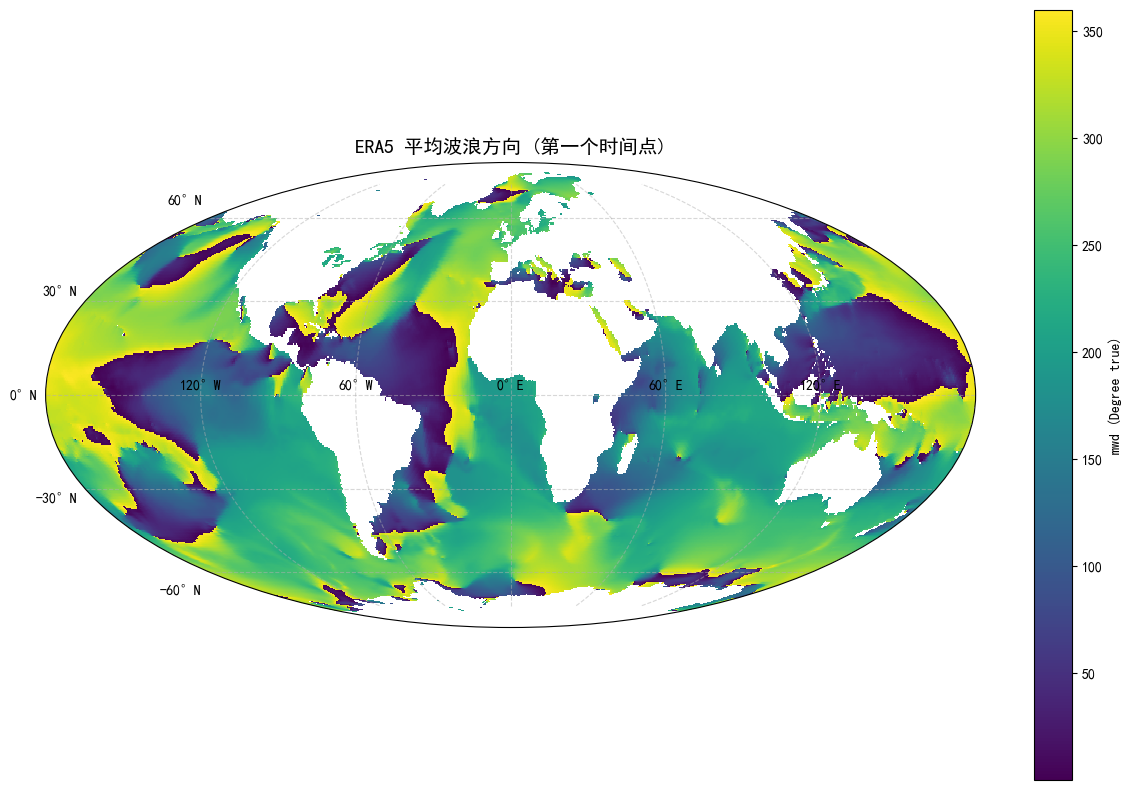

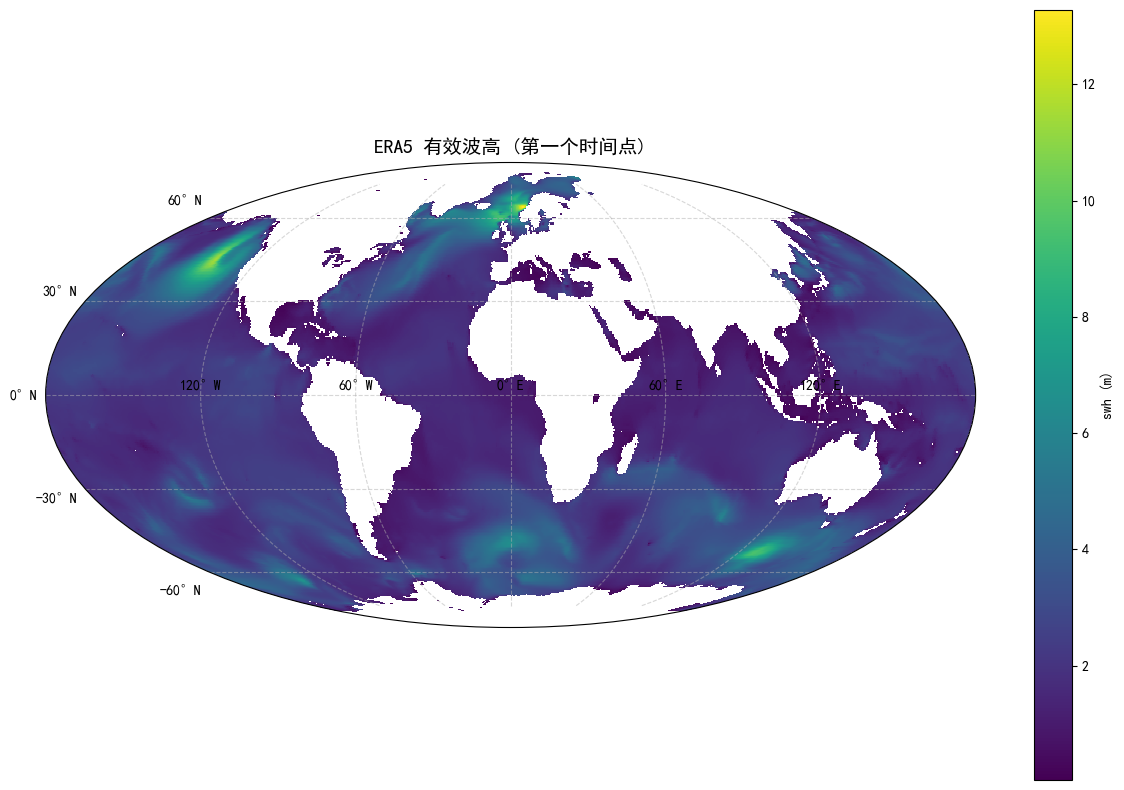

In [15]:
# 创建一个函数来绘制变量的空间分布
def plot_variable(ds, variable, time_index=0, title=None):
    plt.figure(figsize=(15, 10))
    
    # 获取变量的属性
    var_attrs = ds[variable].attrs
    units = var_attrs.get('units', '')
    
    # 绘制数据
    data = ds[variable].isel(valid_time=time_index)  # 使用 valid_time 而不是 time
    
    # 使用更好的投影和颜色方案
    plt.subplot(projection='mollweide')
    
    # 获取原始经纬度数据
    lons = ds.longitude.values
    lats = ds.latitude.values
    
    # 重新排列数据以适应 -180 到 180 度的范围
    # 找到180度的位置
    split_idx = np.searchsorted(lons, 180)
    
    # 重新排列经度和数据
    lons_wrapped = np.concatenate([lons[split_idx:] - 360, lons[:split_idx]])
    data_wrapped = np.concatenate([data.values[:, split_idx:], data.values[:, :split_idx]], axis=1)
    
    # 转换为弧度
    lons_rad = np.radians(lons_wrapped)
    lats_rad = np.radians(lats)
    
    # 创建网格
    lon_grid, lat_grid = np.meshgrid(lons_rad, lats_rad)
    
    # 绘制数据
    im = plt.pcolormesh(lon_grid, lat_grid, data_wrapped, 
                       cmap='viridis', shading='auto')
    
    # 添加标题和颜色条
    if title:
        plt.title(title, fontsize=14)
    else:
        plt.title(f'{variable} 分布图', fontsize=14)
    
    # 添加颜色条
    cbar = plt.colorbar(im)
    cbar.set_label(f'{variable} ({units})')
    
    # 添加网格和标签
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # 设置刻度标签
    parallels = np.array([-60, -30, 0, 30, 60])
    meridians = np.array([-120, -60, 0, 60, 120])
    plt.yticks(np.radians(parallels), [f'{p}°N' for p in parallels])
    plt.xticks(np.radians(meridians), [f'{abs(m)}°{"W" if m < 0 else "E"}' for m in meridians])
    
    plt.show()

# 如果数据集已加载，绘制第一个时间点的数据
if 'ds' in locals():
    print("绘制平均波浪方向(mwd)和有效波高(swh)的空间分布...")
    plot_variable(ds, 'mwd', 0, 'ERA5 平均波浪方向 (第一个时间点)')
    plot_variable(ds, 'swh', 0, 'ERA5 有效波高 (第一个时间点)')

绘制特定位置的时间序列...

选择的位置: 赤道上的点 (0°N, 180°E)


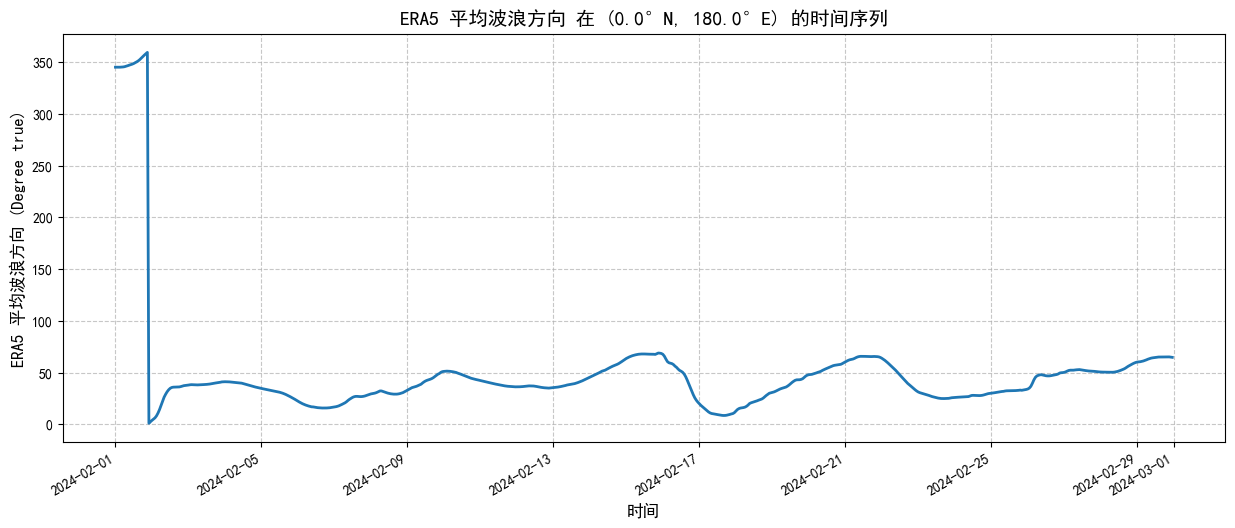

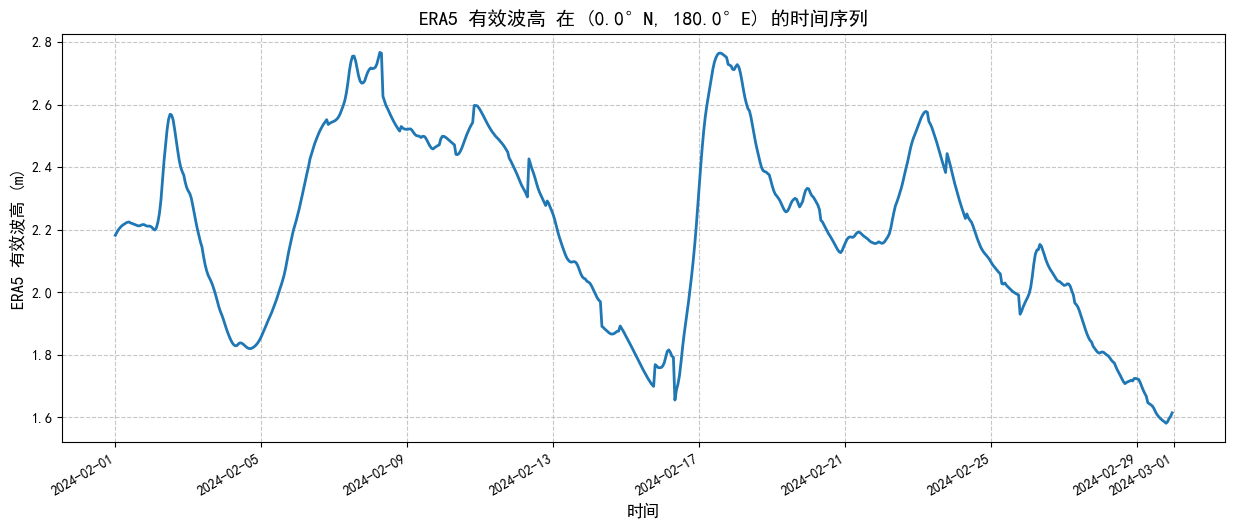

In [16]:
# 创建时间序列图
def plot_time_series(ds, variable, lat=0, lon=0):
    plt.figure(figsize=(15, 6))
    
    # 获取最接近的网格点数据
    data = ds[variable].sel(latitude=lat, longitude=lon, method='nearest')
    
    # 转换时间坐标为更易读的格式
    import pandas as pd  # 添加缺失的导入
    time_values = pd.to_datetime(ds.valid_time.values)  # 使用 valid_time
    
    # 绘制时间序列
    plt.plot(time_values, data, '-', linewidth=2)
    
    # 设置标题和标签
    var_attrs = ds[variable].attrs
    units = var_attrs.get('units', '')
    var_name = 'ERA5 平均波浪方向' if variable == 'mwd' else 'ERA5 有效波高'
    plt.title(f'{var_name} 在 ({lat:.1f}°N, {lon:.1f}°E) 的时间序列', fontsize=14)
    plt.xlabel('时间', fontsize=12)
    plt.ylabel(f'{var_name} ({units})', fontsize=12)
    
    # 添加网格
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 调整x轴日期显示
    plt.gcf().autofmt_xdate()
    
    plt.show()

# 如果数据集已加载，为每个变量绘制时间序列
if 'ds' in locals():
    print("绘制特定位置的时间序列...")
    # 选择赤道附近的一个点
    lat, lon = 0, 180
    print(f"\n选择的位置: 赤道上的点 ({lat}°N, {lon}°E)")
    plot_time_series(ds, 'mwd', lat, lon)
    plot_time_series(ds, 'swh', lat, lon)

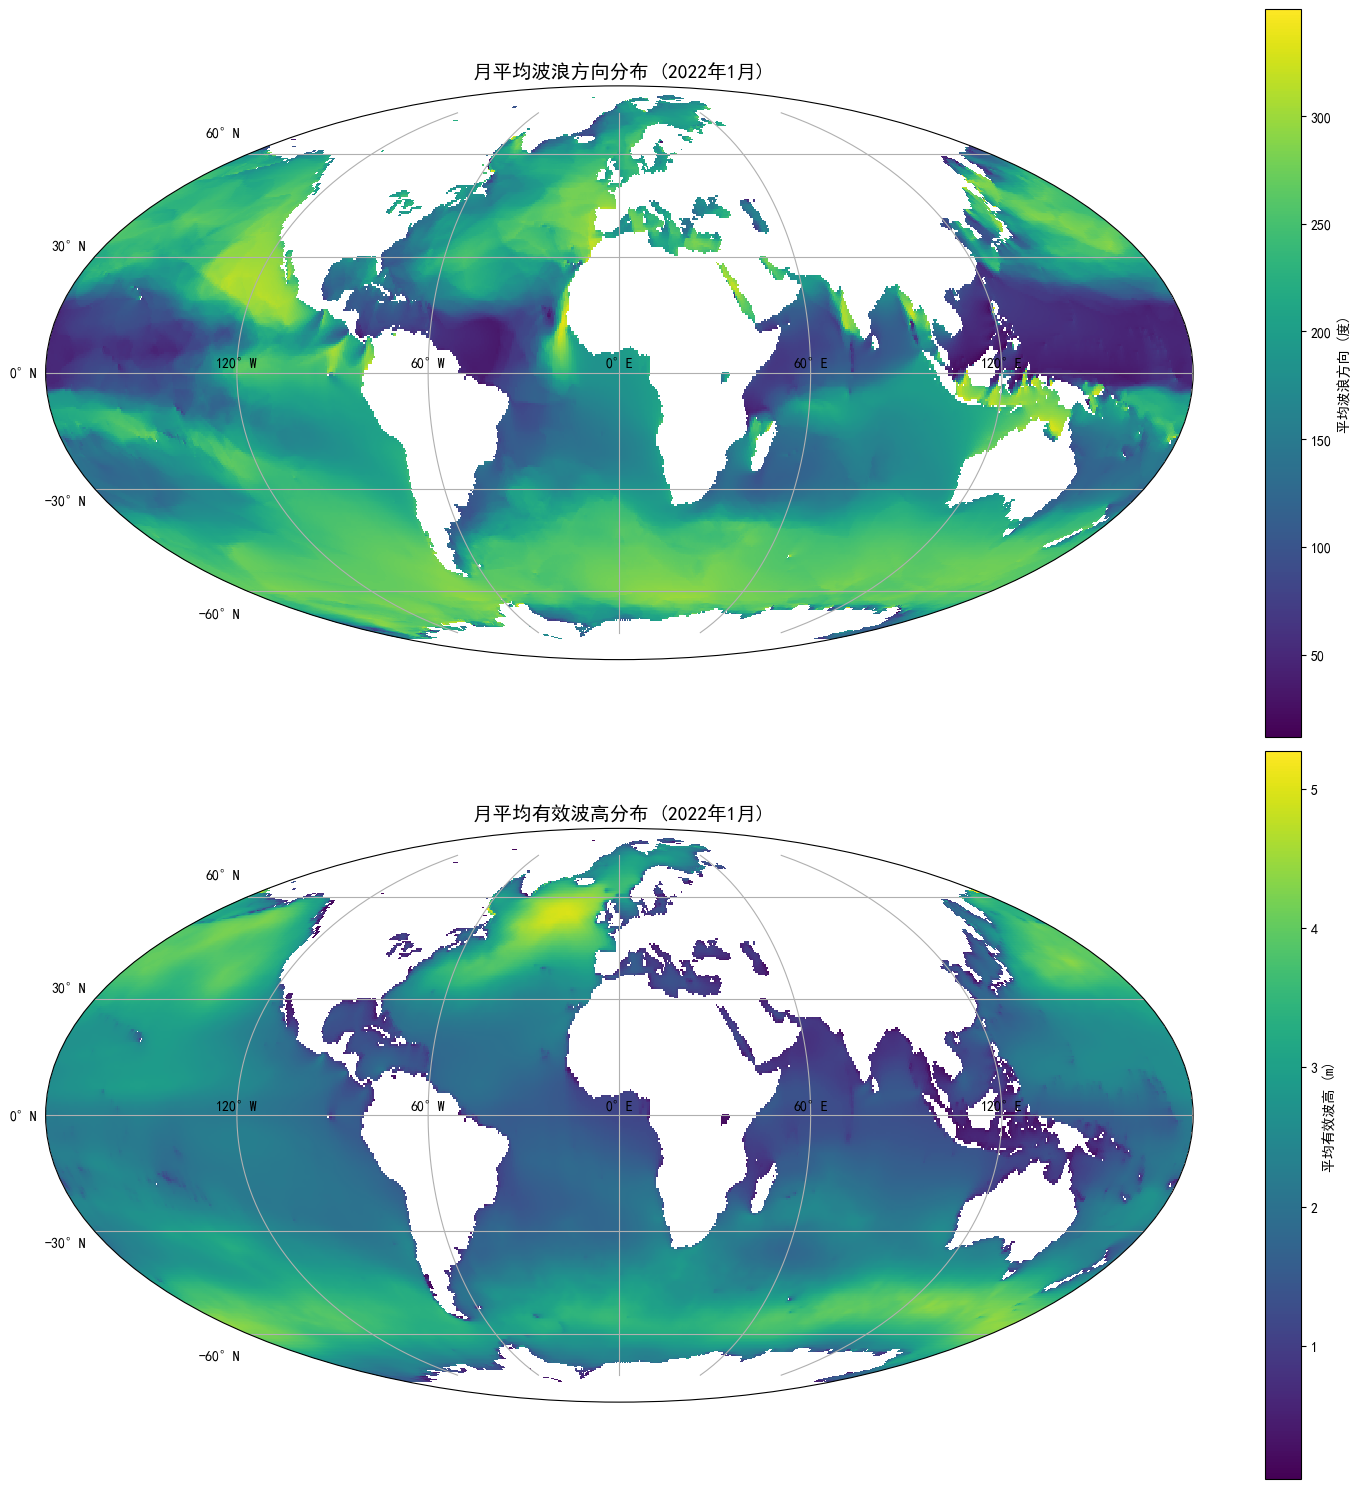


全球统计信息 (2022年1月):
平均波浪方向: 196.99°
最大波浪方向: 349.68°
最小波浪方向: 11.94°

平均有效波高: 2.47 m
最大有效波高: 5.27 m
最小有效波高: 0.04 m


In [17]:
# 创建月平均分布图
if 'ds' in locals():
    plt.figure(figsize=(15, 15))
    
    # 计算月平均值
    mwd_mean = ds['mwd'].mean(dim='valid_time')
    swh_mean = ds['swh'].mean(dim='valid_time')
    
    # 获取原始经纬度数据
    lons = ds.longitude.values
    lats = ds.latitude.values
    
    # 重新排列数据以适应 -180 到 180 度的范围
    split_idx = np.searchsorted(lons, 180)
    
    # 重新排列经度和数据
    lons_wrapped = np.concatenate([lons[split_idx:] - 360, lons[:split_idx]])
    mwd_wrapped = np.concatenate([mwd_mean.values[:, split_idx:], mwd_mean.values[:, :split_idx]], axis=1)
    swh_wrapped = np.concatenate([swh_mean.values[:, split_idx:], swh_mean.values[:, :split_idx]], axis=1)
    
    # 转换为弧度
    lons_rad = np.radians(lons_wrapped)
    lats_rad = np.radians(lats)
    lon_grid, lat_grid = np.meshgrid(lons_rad, lats_rad)
    
    # 创建子图 - 波浪方向
    plt.subplot(211, projection='mollweide')
    im1 = plt.pcolormesh(lon_grid, lat_grid, mwd_wrapped, 
                        cmap='viridis', shading='auto')
    plt.colorbar(im1, label='平均波浪方向 (度)')
    plt.title('月平均波浪方向分布 (2022年1月)', fontsize=14)
    plt.grid(True)
    
    # 设置第一个子图的刻度标签
    parallels = np.array([-60, -30, 0, 30, 60])
    meridians = np.array([-120, -60, 0, 60, 120])
    plt.yticks(np.radians(parallels), [f'{p}°N' for p in parallels])
    plt.xticks(np.radians(meridians), [f'{abs(m)}°{"W" if m < 0 else "E"}' for m in meridians])
    
    # 创建子图 - 有效波高
    plt.subplot(212, projection='mollweide')
    im2 = plt.pcolormesh(lon_grid, lat_grid, swh_wrapped, 
                        cmap='viridis', shading='auto')
    plt.colorbar(im2, label='平均有效波高 (m)')
    plt.title('月平均有效波高分布 (2022年1月)', fontsize=14)
    plt.grid(True)
    
    # 设置第二个子图的刻度标签
    plt.yticks(np.radians(parallels), [f'{p}°N' for p in parallels])
    plt.xticks(np.radians(meridians), [f'{abs(m)}°{"W" if m < 0 else "E"}' for m in meridians])
    
    plt.tight_layout()
    plt.show()

    # 打印全球统计信息
    print("\n全球统计信息 (2022年1月):")
    print(f"平均波浪方向: {mwd_mean.mean().values:.2f}°")
    print(f"最大波浪方向: {mwd_mean.max().values:.2f}°")
    print(f"最小波浪方向: {mwd_mean.min().values:.2f}°")
    print("\n平均有效波高: {:.2f} m".format(swh_mean.mean().values))
    print("最大有效波高: {:.2f} m".format(swh_mean.max().values))
    print("最小有效波高: {:.2f} m".format(swh_mean.min().values))

读取10月数据: era5_202210.nc


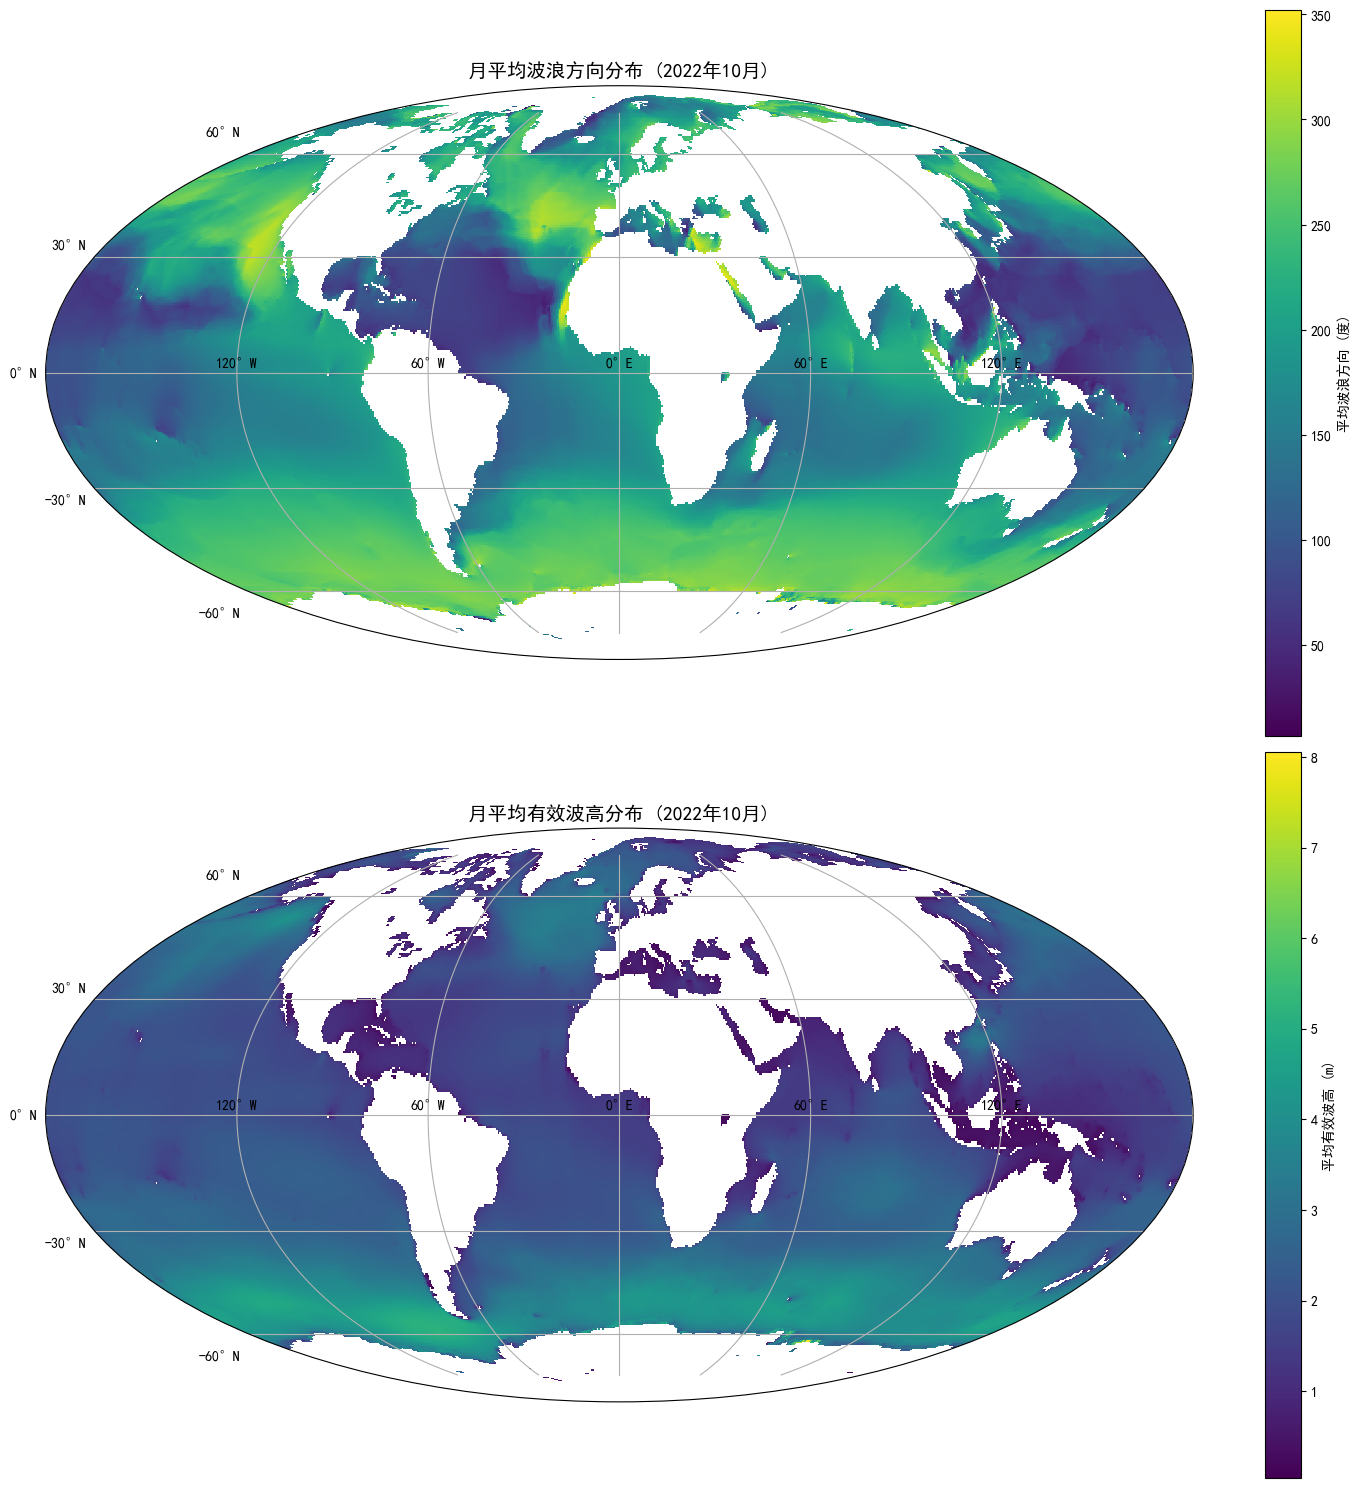


全球统计信息 (2022年10月):
平均波浪方向: 188.46°
最大波浪方向: 352.25°
最小波浪方向: 6.99°

平均有效波高: 2.42 m
最大有效波高: 8.06 m
最小有效波高: 0.04 m


In [18]:
# 函数用于读取指定月份的数据
def load_era5_data(month):
    # 确保月份在有效范围内
    if not 1 <= month <= 12:
        raise ValueError("月份必须在1到12之间")
        
    # 构建文件名
    filename = f"era5_{2022:04d}{month:02d}.nc"
    
    if filename not in era5_files:
        raise FileNotFoundError(f"找不到{filename}文件")
    
    print(f"读取{month}月数据: {filename}")
    return xr.open_dataset(filename, engine='netcdf4')

# 读取10月数据并绘制
try:
    ds_oct = load_era5_data(10)
    
    plt.figure(figsize=(15, 15))
    
    # 计算月平均值
    mwd_mean = ds_oct['mwd'].mean(dim='valid_time')
    swh_mean = ds_oct['swh'].mean(dim='valid_time')
    
    # 获取原始经纬度数据
    lons = ds_oct.longitude.values
    lats = ds_oct.latitude.values
    
    # 重新排列数据以适应 -180 到 180 度的范围
    split_idx = np.searchsorted(lons, 180)
    
    # 重新排列经度和数据
    lons_wrapped = np.concatenate([lons[split_idx:] - 360, lons[:split_idx]])
    mwd_wrapped = np.concatenate([mwd_mean.values[:, split_idx:], mwd_mean.values[:, :split_idx]], axis=1)
    swh_wrapped = np.concatenate([swh_mean.values[:, split_idx:], swh_mean.values[:, :split_idx]], axis=1)
    
    # 转换为弧度
    lons_rad = np.radians(lons_wrapped)
    lats_rad = np.radians(lats)
    lon_grid, lat_grid = np.meshgrid(lons_rad, lats_rad)
    
    # 创建子图 - 波浪方向
    plt.subplot(211, projection='mollweide')
    im1 = plt.pcolormesh(lon_grid, lat_grid, mwd_wrapped, 
                        cmap='viridis', shading='auto')
    plt.colorbar(im1, label='平均波浪方向 (度)')
    plt.title('月平均波浪方向分布 (2022年10月)', fontsize=14)
    plt.grid(True)
    
    # 设置第一个子图的刻度标签
    parallels = np.array([-60, -30, 0, 30, 60])
    meridians = np.array([-120, -60, 0, 60, 120])
    plt.yticks(np.radians(parallels), [f'{p}°N' for p in parallels])
    plt.xticks(np.radians(meridians), [f'{abs(m)}°{"W" if m < 0 else "E"}' for m in meridians])
    
    # 创建子图 - 有效波高
    plt.subplot(212, projection='mollweide')
    im2 = plt.pcolormesh(lon_grid, lat_grid, swh_wrapped, 
                        cmap='viridis', shading='auto')
    plt.colorbar(im2, label='平均有效波高 (m)')
    plt.title('月平均有效波高分布 (2022年10月)', fontsize=14)
    plt.grid(True)
    
    # 设置第二个子图的刻度标签
    plt.yticks(np.radians(parallels), [f'{p}°N' for p in parallels])
    plt.xticks(np.radians(meridians), [f'{abs(m)}°{"W" if m < 0 else "E"}' for m in meridians])
    
    plt.tight_layout()
    plt.show()

    # 打印全球统计信息
    print("\n全球统计信息 (2022年10月):")
    print(f"平均波浪方向: {mwd_mean.mean().values:.2f}°")
    print(f"最大波浪方向: {mwd_mean.max().values:.2f}°")
    print(f"最小波浪方向: {mwd_mean.min().values:.2f}°")
    print("\n平均有效波高: {:.2f} m".format(swh_mean.mean().values))
    print("最大有效波高: {:.2f} m".format(swh_mean.max().values))
    print("最小有效波高: {:.2f} m".format(swh_mean.min().values))
    
    # 关闭数据集
    ds_oct.close()

except Exception as e:
    print(f"发生错误: {str(e)}")